In [1]:
from google.colab import drive
drive.mount("/content/grive")

Mounted at /content/grive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load the new dataset with labeling

In [5]:
data = pd.read_csv("/content/grive/MyDrive/labeled_data.csv",index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Data Preprocessing and Feature Engineering

In [6]:
data.head()

,publish_date,headline_text,Polarity,Subjectivity,Analysis
0,20030219,aba decides against community broadcasting lic...,0.00,0.00,Neutral
1,20030219,act fire witnesses must be aware of defamation,0.25,0.25,Positive
2,20030219,a g calls for infrastructure protection summit,0.00,0.00,Neutral
3,20030219,air nz staff in aust strike for pay rise,0.00,0.00,Neutral
4,20030219,air nz strike to affect australian travellers,0.00,0.00,Neutral


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226258 entries, 0 to 1226257
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   publish_date   1226258 non-null  int64  
 1   headline_text  1226258 non-null  object 
 2   Polarity       1226258 non-null  float64
 3   Subjectivity   1226258 non-null  float64
 4   Analysis       1226258 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 56.1+ MB


In [8]:
data['Analysis'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [9]:
print(data[data['Analysis']=="Positive"]['Analysis'].count())
print(data[data['Analysis']=="Negative"]['Analysis'].count())
print(data[data['Analysis']=="Neutral"]['Analysis'].count())

209676
156163
860419


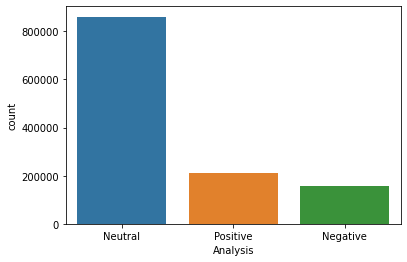

In [10]:
sns.countplot(x ='Analysis', data = data)

# Divide the data in 3 segments {'Neutral':0,'Positive':1,'Negative':-1}

In [11]:
data['labels'] = data['Analysis'].map({'Neutral':0,'Positive':1,'Negative':-1})

In [12]:
data.head()

,publish_date,headline_text,Polarity,Subjectivity,Analysis,labels
0,20030219,aba decides against community broadcasting lic...,0.00,0.00,Neutral,0
1,20030219,act fire witnesses must be aware of defamation,0.25,0.25,Positive,1
2,20030219,a g calls for infrastructure protection summit,0.00,0.00,Neutral,0
3,20030219,air nz staff in aust strike for pay rise,0.00,0.00,Neutral,0
4,20030219,air nz strike to affect australian travellers,0.00,0.00,Neutral,0


# Remove stopwords and punctuations

In [ ]:
punct =string.punctuation
stop_words = stopwords.words('english')
clean_data = []
def data_preprocessing(news):
  words =[]

  for word in nltk.word_tokenize(news):
    if word not in punct:
        if word not in stop_words:
          words.append(word)
  clean_data.append(" ".join(words))      
  

data['headline_text'].apply(data_preprocessing)

# lemmatize the words

In [14]:
normalize = []
def normalization(clean_data):
  lem = WordNetLemmatizer()
    
  for headline in clean_data:
    normalized_tweet = []
    for word in nltk.word_tokenize(headline):
        normalized_text = lem.lemmatize(word,'v')
        normalized_tweet.append(normalized_text)
    normalize.append(" ".join(normalized_tweet))
    
normalization(clean_data)

# divide the data in X_train and y_train

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data['headline_text'], data['labels'], test_size=0.2)

In [ ]:
## Pipelines Creation
## 1. strings to token integer counts by using CountVectorizer
## 2. integer counts to weighted TF-IDF scores by using TfidfTransformer
## 3. Apply  Classifier

In [99]:
pipeline_dt=Pipeline([('cv1',CountVectorizer()),
                     ('tfidf1',TfidfTransformer()),
                     ('dt_classifier',DecisionTreeClassifier(max_depth=40))])

In [100]:
pipeline_randomforest=Pipeline([('cv2',CountVectorizer()),
                     ('tfidf2',TfidfTransformer()),
                     ('rf_classifier',RandomForestClassifier(max_depth=10))])

In [101]:
pipeline_multinomialnb=Pipeline([('cv3',CountVectorizer()),
                     ('tfidf3',TfidfTransformer()),
                     ('nb_classifier',MultinomialNB())])

In [102]:
## LEts make the list of pipelines
pipelines = [pipeline_dt,pipeline_randomforest,pipeline_multinomialnb]

In [103]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'RandomForest', 2: 'MultinomialNB'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [104]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Decision Tree Test Accuracy: 0.8601112325281751
RandomForest Test Accuracy: 0.7013153817298126
MultinomialNB Test Accuracy: 0.9150302545952734


In [105]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [106]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:MultinomialNB


In [109]:
pipelines[2]

Pipeline(memory=None,
         steps=[('cv3',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf3',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('nb_classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [108]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(pipelines[2], open(filename, 'wb'))